In [1]:
import pandas as pd

In [2]:
data_tweet = pd.read_csv (r"C:\Users\vira_\Downloads\tweet_emotions.csv")

In [3]:
data_tweet.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


### Data visualization

In [4]:
import matplotlib.pyplot as plt

In [5]:
data_value = data_tweet["sentiment"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 2.7, 2.7)

In [6]:
value_counts = data_tweet["sentiment"].value_counts()
df = pd.DataFrame(value_counts)
df = df.reset_index()
df.columns = ['unique_values', 'counts for sentiment']

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

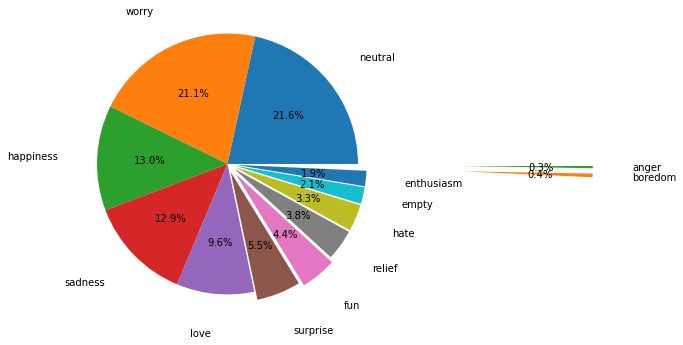

In [7]:
plt.pie(x = data_value, labels = df['unique_values'], explode = explode, autopct='%.1f%%', labeldistance = 1.3, 
        radius = 1.5, data = data_tweet)
data_tweet["sentiment"].value_counts()

In [8]:
data_tweet["sentiment"] = data_tweet["sentiment"].apply(lambda x: x if x in ['neutral', 'worry', 'happiness', 'sadness', 'love'] 
                                               else 'other')

In [9]:
data_value = data_tweet["sentiment"].value_counts()
value_counts1 = data_tweet["sentiment"].value_counts()
df1 = pd.DataFrame(value_counts1)
df1 = df1.reset_index()
df1.columns = ['unique_values', 'counts for sentiment']

other        8687
neutral      8638
worry        8459
happiness    5209
sadness      5165
love         3842
Name: sentiment, dtype: int64

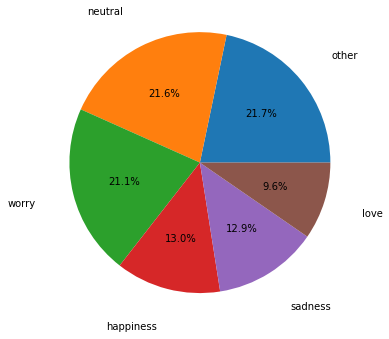

In [10]:
plt.pie(x = data_value, labels = df1['unique_values'], autopct='%.1f%%', labeldistance = 1.3, 
        radius = 1.5, data = data_tweet)
data_tweet["sentiment"].value_counts()

### Preprocessing

In [11]:
import re
from nltk.tokenize import TweetTokenizer
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

In [12]:
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    lemma_text = [stemmer.lemmatize(word) for word in tokens]
    stops = set(stopwords.words("english"))
    no_stop_text = [word for word in lemma_text if word not in stops] 
    clean_text = ' '.join(no_stop_text)
    return clean_text

In [13]:
clean_tweets = [preprocess_text(sentence) for sentence in data_tweet["content"]]

In [14]:
# tweet_tokenizer = TweetTokenizer()
# tweets_tokens = [tweet_tokenizer.tokenize(x) for x in clean_tweets]

### Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf_vect = TfidfVectorizer(stop_words="english")

X = tfidf_vect.fit_transform(clean_tweets) # векторизация очищенного текста

In [16]:
tfidf_vect = TfidfVectorizer(stop_words="english")

X_no_prep = tfidf_vect.fit_transform(data_tweet["content"]) # векторизация неочищенного текста

In [17]:
y = data_tweet["sentiment"]

### Training

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # на очищенном тексте

In [19]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_no_prep, y, test_size=0.3, random_state=123) # на неочищенном тексте

### Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics
clf = MultinomialNB(alpha = 2.2).fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

   happiness       0.48      0.03      0.05      1589
        love       0.58      0.09      0.16      1163
     neutral       0.36      0.27      0.31      2621
       other       0.25      0.53      0.34      2577
     sadness       0.33      0.00      0.00      1538
       worry       0.32      0.55      0.40      2512

    accuracy                           0.30     12000
   macro avg       0.39      0.24      0.21     12000
weighted avg       0.36      0.30      0.25     12000



In [21]:
m_confusion_test = metrics.confusion_matrix(y_test, y_predicted)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted happiness', 'Predicted love', 'Predicted neutral', 
                                                 'Predicted other', 'Predicted sadness', 'Predicted worry'],
            index = ['Actual happiness', 'Actual love', 'Actual neutral', 
                                                 'Actual other', 'Actual sadness', 'Actual worry'])

,Predicted happiness,Predicted love,Predicted neutral,Predicted other,Predicted sadness,Predicted worry
Actual happiness,41,28,277,975,0,268
Actual love,19,107,155,640,0,242
Actual neutral,10,18,715,1100,0,778
Actual other,8,15,410,1359,4,781
Actual sadness,2,0,152,512,3,869
Actual worry,5,15,275,840,2,1375


#### Validation

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

In [24]:
y_predicted_train = clf.predict(X_train)

In [25]:
y_valid1 = y_test.values.reshape(-1,1)
y_valid_train1 = y_train.values.reshape(-1,1)
ypred1 = y_predicted.reshape(-1,1)
ypred_train1 = y_predicted_train.reshape(-1,1)
y_valid1 = pd.DataFrame(y_test)
y_valid_train1 = pd.DataFrame(y_train)
ypred1 = pd.DataFrame(y_predicted)
ypred_train1 = pd.DataFrame(y_predicted_train)


onehotencoder = OneHotEncoder()
y_valid1 = onehotencoder.fit_transform(y_valid1).toarray()
y_valid_train1 = onehotencoder.fit_transform(y_valid_train1).toarray()
ypred1 = onehotencoder.fit_transform(ypred1).toarray()
ypred_train1 = onehotencoder.fit_transform(ypred_train1).toarray()


n_classes = ypred1.shape[1]

In [26]:
print('result on test: {}'.format(roc_auc_score(y_valid1, ypred1, multi_class='ovr')))
print('result on train: {}'.format(roc_auc_score(y_valid_train1, ypred_train1, multi_class='ovr')))

result on test: 0.5482425127992204
result on train: 0.6604528487827822


In [27]:
from itertools import cycle

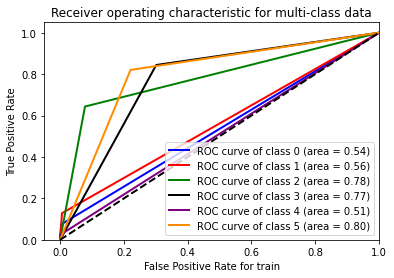

In [28]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_train1[:, i], ypred_train1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for train')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

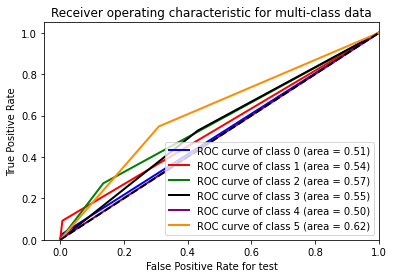

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid1[:, i], ypred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for test')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.metrics import log_loss

In [31]:
log_loss(y_valid1, ypred1)

24.177143476437486

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree_clf = DecisionTreeClassifier().fit(X_train1, y_train1)
tree_y_pred = tree_clf.predict(X_test1)

In [34]:
print(classification_report(y_test1, tree_y_pred, zero_division=0))

              precision    recall  f1-score   support

   happiness       0.25      0.25      0.25      1589
        love       0.36      0.32      0.34      1163
     neutral       0.34      0.40      0.37      2621
       other       0.26      0.26      0.26      2577
     sadness       0.26      0.21      0.24      1538
       worry       0.31      0.31      0.31      2512

    accuracy                           0.30     12000
   macro avg       0.30      0.29      0.29     12000
weighted avg       0.30      0.30      0.30     12000



In [35]:
m_confusion_test = metrics.confusion_matrix(y_test1, tree_y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted happiness', 'Predicted love', 'Predicted neutral', 
                                                 'Predicted other', 'Predicted sadness', 'Predicted worry'],
            index = ['Actual happiness', 'Actual love', 'Actual neutral', 
                                                 'Actual other', 'Actual sadness', 'Actual worry'])

,Predicted happiness,Predicted love,Predicted neutral,Predicted other,Predicted sadness,Predicted worry
Actual happiness,393,170,354,378,97,197
Actual love,247,372,172,189,65,118
Actual neutral,261,123,1043,537,198,459
Actual other,360,179,634,681,235,488
Actual sadness,112,69,299,313,329,416
Actual worry,194,117,559,543,329,770


In [36]:
df1 = pd.DataFrame(tree_clf.feature_importances_)
df1["feature"] = tfidf_vect.get_feature_names_out()

feature_importances1 = df1.nlargest(20,0)
feature_importances_array1 = feature_importances1.feature.values

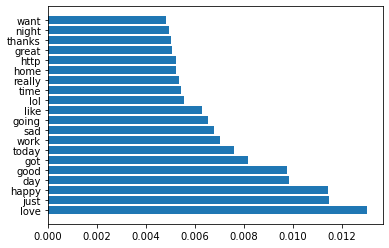

In [37]:
plt.barh(feature_importances_array1, feature_importances1[0])
plt.show()

#### Validation

In [38]:
tree_y_pred_train = tree_clf.predict(X_train1)

In [39]:
y_valid2 = y_test1.values.reshape(-1,1)
y_valid_train2 = y_train1.values.reshape(-1,1)
ypred2 = tree_y_pred.reshape(-1,1)
ypred_train2 = tree_y_pred_train.reshape(-1,1)
y_valid2 = pd.DataFrame(y_test1)
y_valid_train2 = pd.DataFrame(y_train1)
ypred2 = pd.DataFrame(tree_y_pred)
ypred_train2 = pd.DataFrame(tree_y_pred_train)


onehotencoder = OneHotEncoder()
y_valid2 = onehotencoder.fit_transform(y_valid2).toarray()
y_valid_train2 = onehotencoder.fit_transform(y_valid_train2).toarray()
ypred2 = onehotencoder.fit_transform(ypred2).toarray()
ypred_train2 = onehotencoder.fit_transform(ypred_train2).toarray()


n_classes = ypred2.shape[1]

In [40]:
print('result on test: {}'.format(roc_auc_score(y_valid2, ypred2, multi_class='ovr')))
print('result on train: {}'.format(roc_auc_score(y_valid_train2, ypred_train2, multi_class='ovr')))

result on test: 0.5740008347813045
result on train: 0.995508139896088


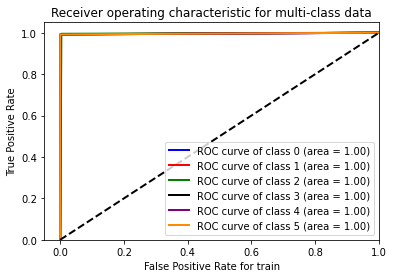

In [41]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_train2[:, i], ypred_train2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for train')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

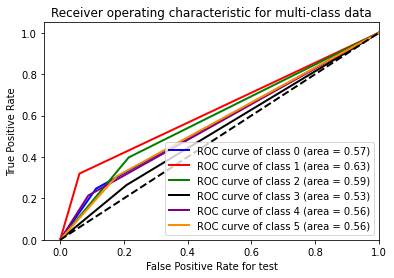

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid2[:, i], ypred2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for test')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [43]:
log_loss(y_valid2, ypred2)

24.211682252832397

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(X_train1, y_train1)

preds = rf.predict(X_test1)

print(classification_report(y_test1, preds, zero_division=0))

              precision    recall  f1-score   support

   happiness       0.50      0.00      0.01      1589
        love       0.65      0.04      0.08      1163
     neutral       0.32      0.63      0.42      2621
       other       0.26      0.43      0.32      2577
     sadness       0.00      0.00      0.00      1538
       worry       0.37      0.37      0.37      2512

    accuracy                           0.31     12000
   macro avg       0.35      0.24      0.20     12000
weighted avg       0.33      0.31      0.25     12000



In [68]:
m_confusion_test = metrics.confusion_matrix(y_test1, preds)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted happiness', 'Predicted love', 'Predicted neutral', 
                                                 'Predicted other', 'Predicted sadness', 'Predicted worry'],
            index = ['Actual happiness', 'Actual love', 'Actual neutral', 
                                                 'Actual other', 'Actual sadness', 'Actual worry'])

,Predicted happiness,Predicted love,Predicted neutral,Predicted other,Predicted sadness,Predicted worry
Actual happiness,5,4,646,805,0,129
Actual love,1,47,364,621,0,130
Actual neutral,2,5,1655,627,0,332
Actual other,1,10,1083,1103,0,380
Actual sadness,0,2,496,435,0,605
Actual worry,1,4,928,659,1,919


In [47]:
df2 = pd.DataFrame(rf.feature_importances_) 
df2["feature"] = pd.Series(tfidf_vect.get_feature_names_out())
df2["feature"] = df2["feature"].fillna(0)

feature_importances2 = df2.nlargest(20,0)
feature_importances_array2 = feature_importances2.feature.values

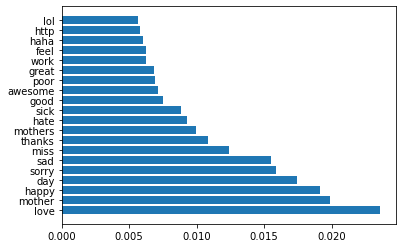

In [48]:
plt.barh(feature_importances_array2, feature_importances2[0])
plt.show()

#### Validation

In [69]:
preds_train = rf.predict(X_train1)

In [71]:
y_valid3 = y_test1.values.reshape(-1,1)
y_valid_train3 = y_train1.values.reshape(-1,1)
ypred3 = preds.reshape(-1,1)
ypred_train3 = preds_train.reshape(-1,1)
y_valid3 = pd.DataFrame(y_test1)
y_valid_train3 = pd.DataFrame(y_train1)
ypred3 = pd.DataFrame(preds)
ypred_train3 = pd.DataFrame(preds_train)


onehotencoder = OneHotEncoder()
y_valid3 = onehotencoder.fit_transform(y_valid3).toarray()
y_valid_train3 = onehotencoder.fit_transform(y_valid_train3).toarray()
ypred3 = onehotencoder.fit_transform(ypred3).toarray()
ypred_train3 = onehotencoder.fit_transform(ypred_train3).toarray()


n_classes = ypred3.shape[1]

In [72]:
print('result on test: {}'.format(roc_auc_score(y_valid3, ypred3, multi_class='ovr')))
print('result on train: {}'.format(roc_auc_score(y_valid_train3, ypred_train3, multi_class='ovr')))

result on test: 0.5492428923987719
result on train: 0.5987162638325382


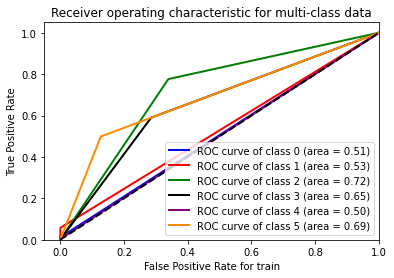

In [73]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_train3[:, i], ypred_train3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for train')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

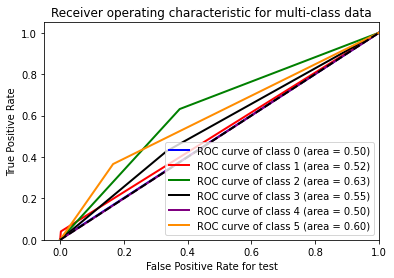

In [74]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid3[:, i], ypred3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for test')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [75]:
log_loss(y_valid3, ypred3)

23.805851630192198

### Support Vector Machines

In [76]:
from sklearn.svm import SVC

In [77]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [78]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test, zero_division=0))

              precision    recall  f1-score   support

   happiness       0.22      0.37      0.27       926
        love       0.36      0.53      0.43       783
     neutral       0.56      0.35      0.43      4205
       other       0.35      0.30      0.32      2989
     sadness       0.13      0.41      0.19       475
       worry       0.38      0.37      0.37      2622

    accuracy                           0.36     12000
   macro avg       0.33      0.39      0.34     12000
weighted avg       0.41      0.36      0.37     12000



In [79]:
m_confusion_test = metrics.confusion_matrix(y_test, pred_svm)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted happiness', 'Predicted love', 'Predicted neutral', 
                                                 'Predicted other', 'Predicted sadness', 'Predicted worry'],
            index = ['Actual happiness', 'Actual love', 'Actual neutral', 
                                                 'Actual other', 'Actual sadness', 'Actual worry'])

,Predicted happiness,Predicted love,Predicted neutral,Predicted other,Predicted sadness,Predicted worry
Actual happiness,345,100,516,483,12,133
Actual love,170,415,246,216,17,99
Actual neutral,114,64,1456,504,44,439
Actual other,193,93,884,892,54,461
Actual sadness,39,48,384,345,193,529
Actual worry,65,63,719,549,155,961


#### Validation

In [80]:
pred_svm_train = model.predict(X_train)

In [81]:
y_valid4 = y_test.values.reshape(-1,1)
y_valid_train4 = y_train.values.reshape(-1,1)
ypred4 = pred_svm.reshape(-1,1)
ypred_train4 = pred_svm_train.reshape(-1,1)
y_valid4 = pd.DataFrame(y_test)
y_valid_train4 = pd.DataFrame(y_train)
ypred4 = pd.DataFrame(pred_svm)
ypred_train4 = pd.DataFrame(pred_svm_train)


onehotencoder = OneHotEncoder()
y_valid4 = onehotencoder.fit_transform(y_valid4).toarray()
y_valid_train4 = onehotencoder.fit_transform(y_valid_train4).toarray()
ypred4 = onehotencoder.fit_transform(ypred4).toarray()
ypred_train4 = onehotencoder.fit_transform(ypred_train4).toarray()


n_classes = ypred4.shape[1]

In [82]:
print('result on test: {}'.format(roc_auc_score(y_valid4, ypred4, multi_class='ovr')))
print('result on train: {}'.format(roc_auc_score(y_valid_train4, ypred_train4, multi_class='ovr')))

result on test: 0.598019387433716
result on train: 0.9306581380063501


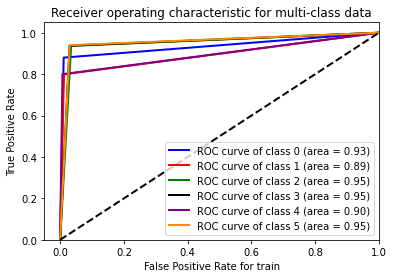

In [83]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_train4[:, i], ypred_train4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for train')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

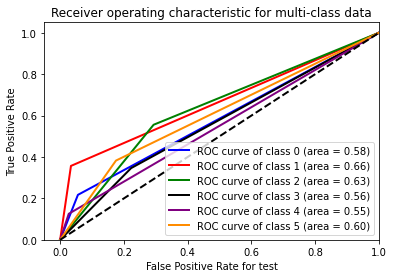

In [84]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid4[:, i], ypred4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for test')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [85]:
log_loss(y_valid4, ypred4)

22.271754311984914

### Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gb_clf = GradientBoostingClassifier(n_iter_no_change=5, verbose=10)

In [106]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.7242           14.90m
         2           1.7097           15.27m
         3           1.6988           14.54m
         4           1.6901           14.03m
         5           1.6829           13.60m
         6           1.6764           13.71m
         7           1.6708           13.78m
         8           1.6657           13.49m
         9           1.6616           13.45m
        10           1.6574           13.33m
        11           1.6536           13.22m
        12           1.6502           13.11m
        13           1.6471           12.94m
        14           1.6439           12.81m
        15           1.6411           12.66m
        16           1.6384           12.56m
        17           1.6356           12.35m
        18           1.6329           12.23m
        19           1.6302           12.03m
        20           1.6276           11.86m
        21           1.6254           11.71m
        2

GradientBoostingClassifier(n_iter_no_change=5, verbose=10)

In [107]:
gb_y_pred = gb_clf.predict(X_test)

In [108]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

   happiness       0.36      0.23      0.28      1589
        love       0.51      0.38      0.43      1163
     neutral       0.32      0.66      0.43      2621
       other       0.30      0.29      0.29      2577
     sadness       0.43      0.17      0.24      1538
       worry       0.39      0.26      0.31      2512

    accuracy                           0.35     12000
   macro avg       0.39      0.33      0.33     12000
weighted avg       0.37      0.35      0.33     12000



In [109]:
m_confusion_test = metrics.confusion_matrix(y_test, gb_clf.predict(X_test))


pd.DataFrame(data = m_confusion_test, columns = ['Predicted happiness', 'Predicted love', 'Predicted neutral', 
                                                 'Predicted other', 'Predicted sadness', 'Predicted worry'],
            index = ['Actual happiness', 'Actual love', 'Actual neutral', 
                                                 'Actual other', 'Actual sadness', 'Actual worry'])

,Predicted happiness,Predicted love,Predicted neutral,Predicted other,Predicted sadness,Predicted worry
Actual happiness,371,120,606,361,18,113
Actual love,164,440,298,174,31,56
Actual neutral,134,65,1720,394,42,266
Actual other,223,123,1159,736,60,276
Actual sadness,58,49,554,310,262,305
Actual worry,86,74,1040,463,192,657


In [110]:
df3 = pd.DataFrame(gb_clf.feature_importances_) 
df3["feature"] = pd.Series(tfidf_vect.get_feature_names_out())
df3["feature"] = df3["feature"].fillna(0)

feature_importances3 = df3.nlargest(20,0)
feature_importances_array3 = feature_importances3.feature.values

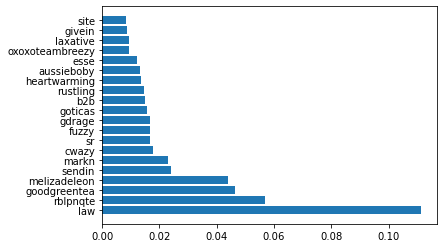

In [111]:
plt.barh(feature_importances_array3, feature_importances3[0])
plt.show()

#### Validation

In [112]:
gb_y_pred_train = gb_clf.predict(X_train)

In [113]:
y_valid5 = y_test.values.reshape(-1,1)
y_valid_train5 = y_train.values.reshape(-1,1)
ypred5 = gb_y_pred.reshape(-1,1)
ypred_train5 = gb_y_pred_train.reshape(-1,1)
y_valid5 = pd.DataFrame(y_test)
y_valid_train5 = pd.DataFrame(y_train)
ypred5 = pd.DataFrame(gb_y_pred)
ypred_train5 = pd.DataFrame(gb_y_pred_train)


onehotencoder = OneHotEncoder()
y_valid5 = onehotencoder.fit_transform(y_valid5).toarray()
y_valid_train5 = onehotencoder.fit_transform(y_valid_train5).toarray()
ypred5 = onehotencoder.fit_transform(ypred5).toarray()
ypred_train5 = onehotencoder.fit_transform(ypred_train5).toarray()


n_classes = ypred5.shape[1]

In [114]:
print('result on test: {}'.format(roc_auc_score(y_valid5, ypred5, multi_class='ovr')))
print('result on train: {}'.format(roc_auc_score(y_valid_train5, ypred_train5, multi_class='ovr')))

result on test: 0.5976249907481749
result on train: 0.6373650682440285


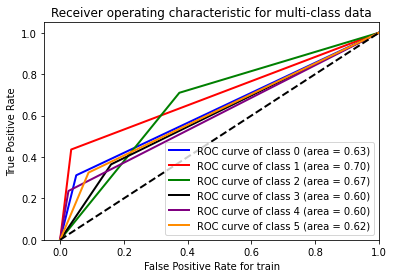

In [115]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_train5[:, i], ypred_train5[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for train')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

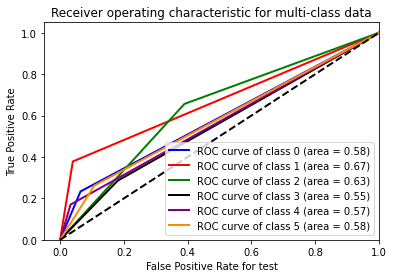

In [116]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid5[:, i], ypred5[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for test')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [117]:
log_loss(y_valid5, ypred5)

22.490499895819347

### K-nearest Neighbors

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train1, y_train1)
knn_y_pred = knn_clf.predict(X_test1)

In [120]:
print(classification_report(y_test1, knn_y_pred))

              precision    recall  f1-score   support

   happiness       0.33      0.03      0.06      1589
        love       0.29      0.10      0.15      1163
     neutral       0.22      0.68      0.33      2621
       other       0.22      0.25      0.23      2577
     sadness       0.25      0.01      0.03      1538
       worry       0.27      0.04      0.07      2512

    accuracy                           0.23     12000
   macro avg       0.26      0.18      0.14     12000
weighted avg       0.26      0.23      0.16     12000



In [121]:
m_confusion_test = metrics.confusion_matrix(y_test1, knn_clf.predict(X_test1))


pd.DataFrame(data = m_confusion_test, columns = ['Predicted happiness', 'Predicted love', 'Predicted neutral', 
                                                 'Predicted other', 'Predicted sadness', 'Predicted worry'],
            index = ['Actual happiness', 'Actual love', 'Actual neutral', 
                                                 'Actual other', 'Actual sadness', 'Actual worry'])

,Predicted happiness,Predicted love,Predicted neutral,Predicted other,Predicted sadness,Predicted worry
Actual happiness,48,63,1072,364,6,36
Actual love,28,113,730,263,5,24
Actual neutral,28,66,1788,654,14,71
Actual other,25,60,1772,637,20,63
Actual sadness,6,20,1048,381,22,61
Actual worry,10,65,1742,577,22,96


#### Validation

In [122]:
knn_y_train_pred = knn_clf.predict(X_train1)

In [123]:
y_valid6 = y_test1.values.reshape(-1,1)
y_valid_train6 = y_train1.values.reshape(-1,1)
ypred6 = knn_y_pred.reshape(-1,1)
ypred_train6 = knn_y_train_pred.reshape(-1,1)
y_valid6 = pd.DataFrame(y_test1)
y_valid_train6 = pd.DataFrame(y_train1)
ypred6 = pd.DataFrame(knn_y_pred)
ypred_train6 = pd.DataFrame(knn_y_train_pred)


onehotencoder = OneHotEncoder()
y_valid6 = onehotencoder.fit_transform(y_valid6).toarray()
y_valid_train6 = onehotencoder.fit_transform(y_valid_train6).toarray()
ypred6 = onehotencoder.fit_transform(ypred6).toarray()
ypred_train6 = onehotencoder.fit_transform(ypred_train6).toarray()


n_classes = ypred6.shape[1]

In [124]:
print('result on test: {}'.format(roc_auc_score(y_valid6, ypred6, multi_class='ovr')))
print('result on train: {}'.format(roc_auc_score(y_valid_train6, ypred_train6, multi_class='ovr')))

result on test: 0.5104359835335295
result on train: 0.6153429000707299


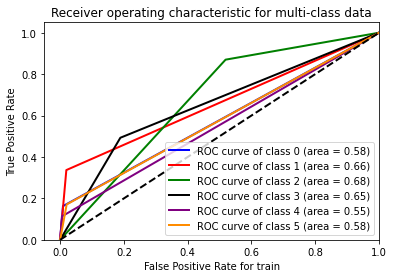

In [125]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_train6[:, i], ypred_train6[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for train')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

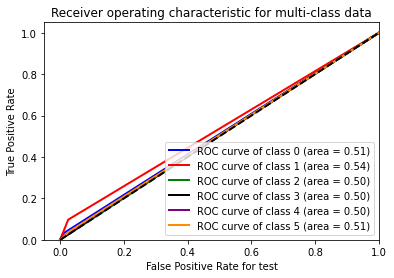

In [126]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid6[:, i], ypred6[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'black', 'purple', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for test')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [127]:
log_loss(y_valid6, ypred6)

26.75603878059082

### Comparison of feature_importances

In [128]:
feat_importances_compar = {'DecisionTreeClassifier': feature_importances_array1.tolist(), 
                           'RandomForestClassifier': feature_importances_array2.tolist(),
                          'GradientBoostingClassifier': feature_importances_array3.tolist()}
pd.DataFrame.from_dict(feat_importances_compar)

,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier
0,love,love,law
1,just,mother,rblpnqte
2,happy,happy,goodgreentea
3,day,day,melizadeleon
4,good,sorry,sendin
5,got,sad,markn
6,today,miss,cwazy
7,work,thanks,sr
8,sad,mothers,fuzzy
9,going,hate,gdrage


### Тестирование на реальных данных

In [129]:
from sklearn.pipeline import Pipeline

In [130]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_tweet["content"], y, test_size=0.3, random_state=42)

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
pipe_lr1 = Pipeline(steps=[('cv', CountVectorizer()),('svm', model)])

In [134]:
pipe_lr1.fit(X_train2, y_train2)

Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC())])

In [135]:
pipe_lr1.score(X_test2, y_test2)

0.3581666666666667

In [136]:
list_of_examples = ["This book was so interesting it made me happy", 
                    "Spoke to my publisher today ... Everything is becoming very real and very exciting!", 
                    "What’s better for your soul than a breezy day at the beach?",
                    "Much love peeps. Awww shizzle! This cheeseburger definitely made me happy. That’s why I had two!",
                    "Sad feeling", "I acted like it wasn’t a big deal when really it was a breaking heart.", 
                    "Mami....i want to go home, I miss you and everyone. Everything seems to be going very badly for me, \
                                      I need your hug so I can continue on this difficult road.", 
                    "Don't worry... Everything is gonna be alright!", "I cant stop worrying about my life.",
                    "Love is all you need", "the world would be a better place if everyone loved like this",
                    "I’m in the garden… and god do I hate flowers", "I’m about to have fun with this chicken…",
                    "I’m so tired of online zoom classes fr tho my eyes be hurting after one lecture \
                        and they expect me to keep sitting at the screen to do more work??",
                    "I'm going to go to a concert", "I didn't have time for lunch because I was reading."]

In [137]:
clean_ex = [preprocess_text(sentence) for sentence in list_of_examples]

In [138]:
preds1 = pipe_lr1.predict(clean_ex)

In [139]:
actual_labels = ['happiness', 'happiness', 'happiness', 'happiness', 'sadness', 'sadness', 'sadness', \
                 'worry', 'worry', 'love', 'love', 'other', 'other', 'other', 'neutral', 'neutral']

In [140]:
labels_compar = {'Predicted labels': preds1, 'Actual labels': actual_labels}
pd.DataFrame.from_dict(labels_compar)

,Predicted labels,Actual labels
0,happiness,happiness
1,neutral,happiness
2,neutral,happiness
3,love,happiness
4,sadness,sadness
5,other,sadness
6,worry,sadness
7,neutral,worry
8,neutral,worry
9,love,love


In [141]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(clean_tweets, y, test_size=0.3, random_state=42)

In [142]:
pipe_lr2 = Pipeline(steps=[('tf',TfidfVectorizer(stop_words="english")),('gb',GradientBoostingClassifier())])

In [143]:
pipe_lr2.fit(X_train3, y_train3)

Pipeline(steps=[('tf', TfidfVectorizer(stop_words='english')),
                ('gb', GradientBoostingClassifier())])

In [144]:
pipe_lr2.score(X_test3, y_test3)

0.3423333333333333

In [145]:
preds2 = pipe_lr2.predict(clean_ex)

In [146]:
labels_compar = {'Predicted labels': preds2, 'Actual labels': actual_labels}
pd.DataFrame.from_dict(labels_compar)

,Predicted labels,Actual labels
0,happiness,happiness
1,neutral,happiness
2,other,happiness
3,love,happiness
4,sadness,sadness
5,other,sadness
6,worry,sadness
7,neutral,worry
8,neutral,worry
9,love,love


In [147]:
pipe_lr3 = Pipeline(steps=[('tf',TfidfVectorizer(stop_words="english")),('svm', model)])

In [148]:
pipe_lr3.fit(X_train3, y_train3)

Pipeline(steps=[('tf', TfidfVectorizer(stop_words='english')), ('svm', SVC())])

In [149]:
pipe_lr3.score(X_test3, y_test3)

0.35541666666666666

In [150]:
preds3 = pipe_lr3.predict(clean_ex)

In [151]:
labels_compar = {'Predicted labels': preds3, 'Actual labels': actual_labels}
pd.DataFrame.from_dict(labels_compar)

,Predicted labels,Actual labels
0,happiness,happiness
1,neutral,happiness
2,other,happiness
3,love,happiness
4,sadness,sadness
5,worry,sadness
6,worry,sadness
7,worry,worry
8,worry,worry
9,love,love
